# Introduction
This notebook's main purpose is to work on a complete regression project on california housing data. We will go through the following checkpoints:
1. Big picture
2. Loading data
3. EDA (Visualization)
4. Prepare data for ML 
5. Model Selection
6. Tuning Model
7. Present solution



## Big Picture
Main questions to ask:
- What is our business objective? 
- How will the company benefit from such model?

lets suppose our main objective for this model is to determine whether it is worth investing in a given area or not.

In [1]:
# Import libraries

# Common imports
import numpy as np
import pandas as pd

# Plotting imports
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings 
import warnings
warnings.filterwarnings(action="ignore")


## Loading Data

In [2]:
df = pd.read_csv(r"C:\Users\tiger\Documents\GitHub\Machine-Learning-Essentials\Data\California Housing\housing.csv")

## EDA

Lets load data with read_csv and take a look at our data with some basic functions
 - head(n): Look at first n lines of data 
 - info(): quick description of the data
 - describe(): Summary of numerical attributes

In [3]:
df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


There are 20640 instances in our dataset. 

Note that there are 20433 instances for total_values, so there might be missing values for that column of data. 

All data are numerical(float64) except for ocean_proximity, which from above we can see it is a categorical value. 

In [5]:
# lets look at this column independently
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
df.describe() # Note: null values are ignored

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### Visualization 
Visualizing is an extremely important part in Data analytics, it makes data so much easier to understand and might even see trends that cannot be identified just by looking at basic information. 

In our case we will be using graphs such as 
1. Histograms
2. Scatterplots    

#### Histogram

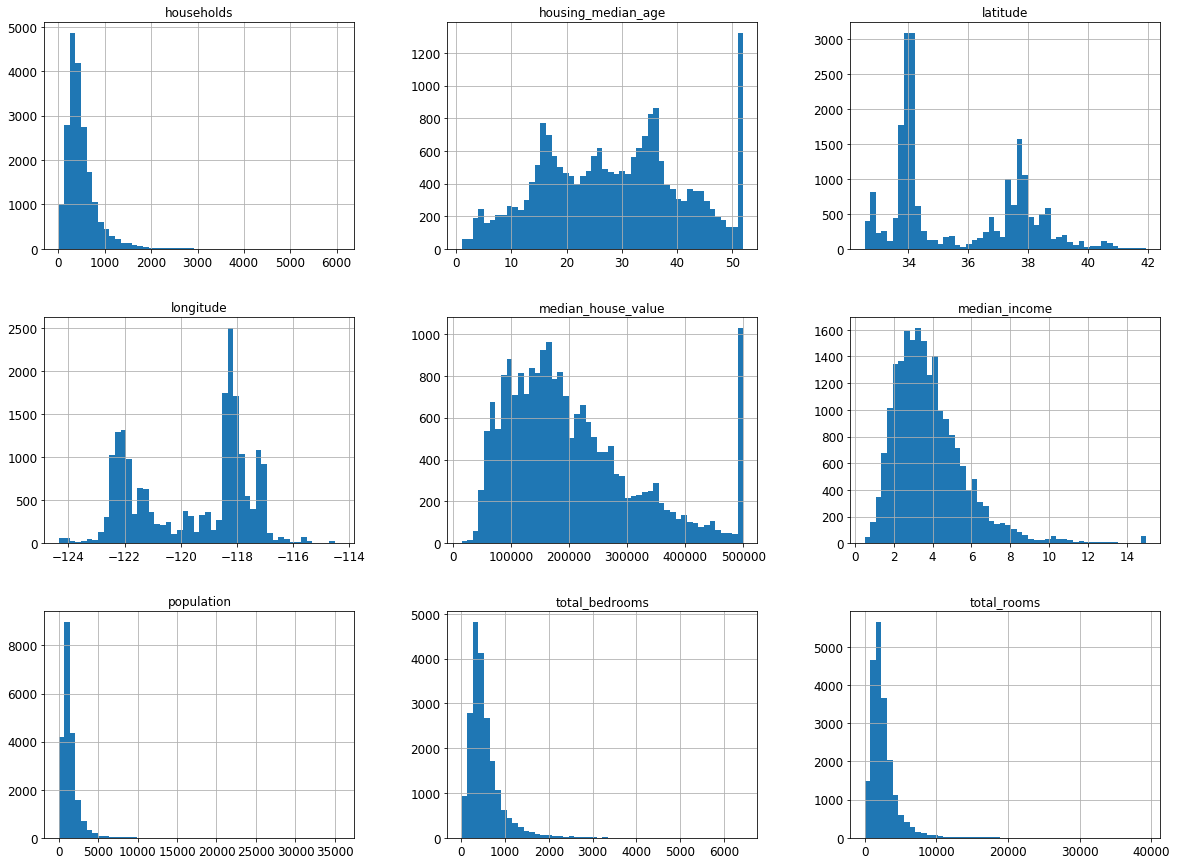

In [7]:
df.hist(bins=50, figsize=(20,15))
plt.show()

Few things to take from these Histograms: 

1. Median incone is not expressed in dolloars, it ranges from 0 to 15. The numbers tens of thousands of dollars. So 5 would be $50,000. 
    
2. housing_median_age and median_housing_value are capped. We have two options for this problem:
  - collect proper data labels for capped values
  - delete capped values


3. Needs feature scaling and transformation. we have skewed or tail-heavy data which we should change to bell-shaped curves. Data also are in different scales.

### Splitting the data into train and test
Splitting data now to prevent overfitting. *Data-Snooping bias*

In [8]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [9]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


NOTE: Train test split is a fine way to sample data if our data is large enough, but if it is not, there is a risk of sampling bias. So we might need *Stratified Sampling*

lets suppose here that the median income is a very important attribute to predict housing prices, so we should ensure that our samples have a correct representation of the dataset.

From the histogram we can see that median income is clustered around 1.5 to 6, hence lets split into 5 categories with 1.5 increments. So category 1 would be less than 1.5, cat 2 would be 1.5 to 3 etc. 

This is considered as **Feature Engineering** and we will be doing a lot more of that later on

In [10]:
df['income_cat'] = pd.cut(df["median_income"],
                          bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                          labels=[1, 2, 3, 4, 5])

In [11]:
df['income_cat'].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

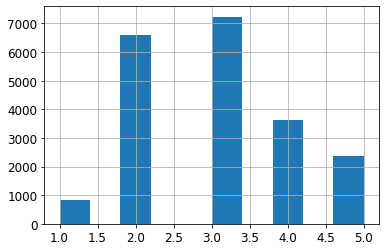

In [12]:
df['income_cat'].hist()

In [13]:
# now lets import stratified shuffle split and split dataset
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in sss.split(df, df["income_cat"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

Now lets check if our StratifiedShuffleSplit worked

In [14]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [15]:
df["income_cat"].value_counts() / len(df)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

As we can see the proportions are fairly identical. So now we delete the income_cat attribute so the data is back to normal, but with correct proportion!

In [16]:
for i in (strat_train_set, strat_test_set):
    i.drop('income_cat', axis=1, inplace=True)

## Visualizing Data

In [17]:
# Copy our test data to explore with
df = strat_train_set.copy()

Lets create a scatterplot with longitude and latitude as our X and Y axis values, population as the radius for each data instance, and represent median_house_value with differnet colors.

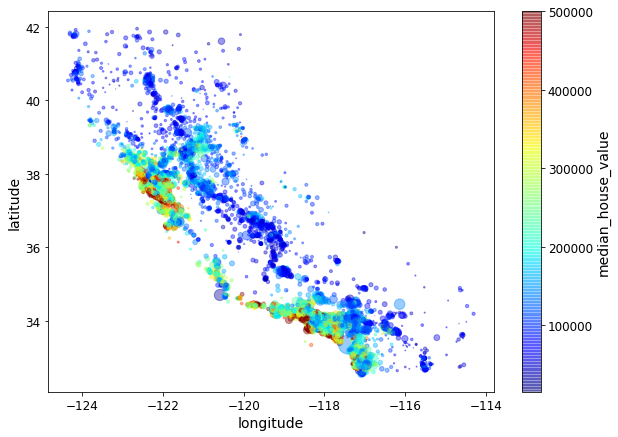

In [18]:
df.plot(kind='scatter', 
        x='longitude', 
        y="latitude", 
        alpha=0.4, 
        s=df['population']/100,  # s here stands for radius of each circle with population
        figsize=(10,7), 
        c='median_house_value', # c is for color representation by house value
        cmap=plt.get_cmap('jet'), # predefined color map
        colorbar=True,
        sharex=False
       )

**Takeaways**
- house price is correlated with distance to ocean.
    
Lets plot:
- scatter matrix
- **Correlation Matrix** with **Seaborn** Correlation heatmap!

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002707AC40A90>,
      dtype=object)

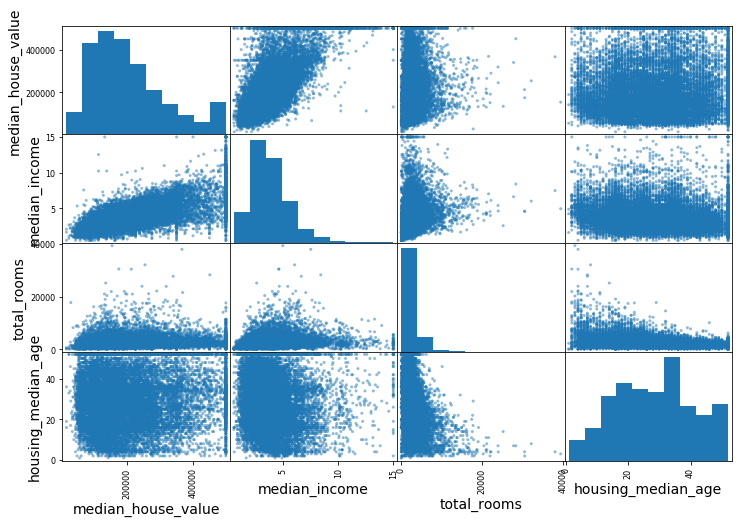

In [19]:
# Scatter matix
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(df[attributes], figsize=(12, 8))

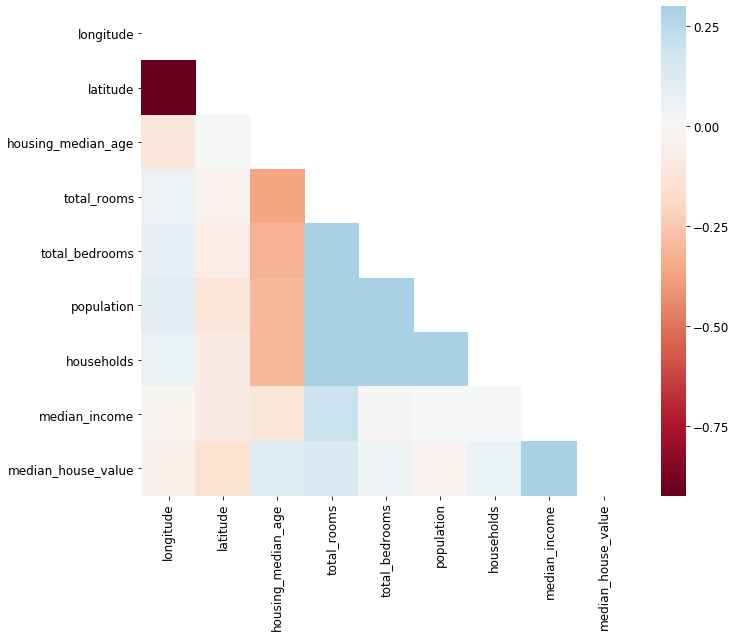

In [20]:
# correlation heatmap
import seaborn as sns

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, 
            mask=mask, 
            cmap='RdBu', 
            vmax=.3, 
            center=0,
            square=True)

**Takeaways**
- Median Income has the highest positive correlation with house value.
- ignore longitude and latitude in this case.
    

### Feature Engineering
Things to change:
1. **total_rooms** is not useful if I dont know how many households there are, so we need to change that to number of rooms per household. 
2. Total number of bedrooms by itself is not as useful.
3. Population per household also seems like an interesting variable.

Idealy this shuold be built as a **pipeline**, so when we get newer data all of feature scaling and feature engineering will be transformed with a pipeline.

In [21]:
# 1
df["rooms_per_household"] = df["total_rooms"]/df["households"]

# 2
df["bedrooms_per_room"] = df["total_bedrooms"]/df["total_rooms"]

# 3
df["population_per_household"]=df["population"]/df["households"]

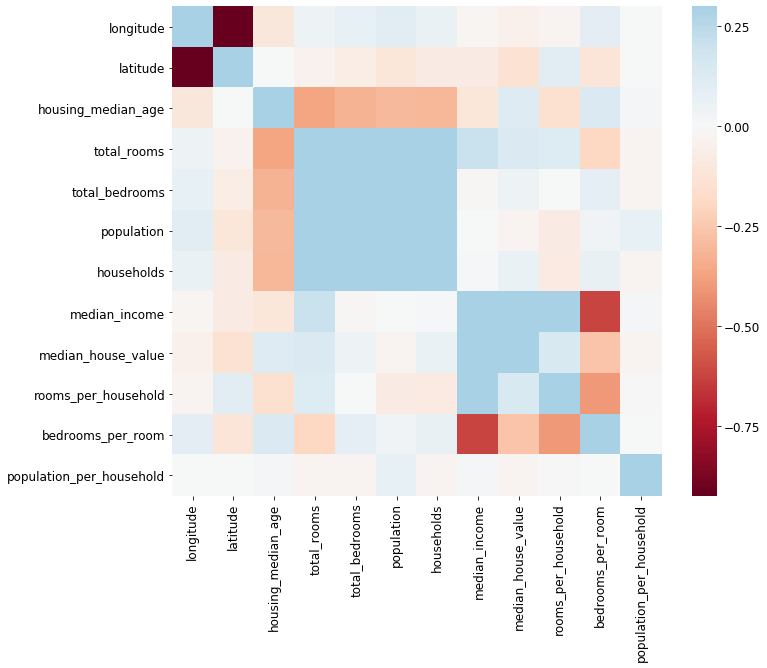

In [22]:
# Compute the correlation matrix Again
corr = df.corr()

f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, 
            cmap='RdBu', 
            vmax=.3, 
            center=0,
            square=True)

- Its normal that attributes we make have high correlation, since the new data is a linear combination of existing attributes.
- we can see from the last 3 color squares for the house value row that these three data does have a slightly better correlation than other attributes.

In [23]:
# Proof with numerical values
df.corr()["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

## Prepare data for ML
Instead of doing this manually we will write this in functions for these purposes:
- reproduce these transformations easily on any dataset
- gradually build a library of transformation functions for future use
- use functions in live system
- easy way of trying out various transformations and see which combination works best

### 1. Data Cleaning (NA Values)
1. get rid fo them entirely (as column or row)
  - dropna(), drop()
2. set them to some value (zero, mean, median, etc)
  - fillna()
  
### 2. Preprocessing Categorical Values
we will do this with **OneHotEncoder**, building all of our transformations into a pipeline.

### 3. Custom Transformers
Create custom transformers through ***duck typing***. Create a class and implement three methods: fit(), transform(), and fit_transform(). In our case we want to make a class that adds the following features:
- rooms_per_household
- bedrooms_per_room
- population_per_household

### 4. Feature scaling
**min-mix scaling (normalization)** or **standardization** with MinMAxScalar or StandardScalar

### 5. Build pipeline
Combine all above into a sequence of transformations for numerical and categorical. Then use **ColumnTransformer** to apply the appropriate transformations to each column.

In [24]:
# Import libraries
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer

# Create a clean training set
# dropping y value
df = strat_train_set.drop('median_house_value', axis=1)
df_labels = strat_train_set['median_house_value'].copy()

In [25]:
# Start with custom transformers

# get the right column indices: 
rooms_col, bedrooms_col, population_col, household_col = [
    list(df.columns).index(col)
    for col in ("total_rooms", "total_bedrooms", "population", "households")]

# Create Class
# BaseEstimator: Base class for all estimators in scikit-learn.
#    - can get methods get_params() and set_params()
# TransformerMixin: Mixin class for all transformers in scikit-learn.
#    - get method fit_transform()
class Add_Combined_Attributes(BaseEstimator, TransformerMixin):
    
    # __init_ is a reseved method in python classes with one hyperparameter, add_bedrooms_per_room
    # add_bedrooms_per_room 
    # added one hyperparameter to see if this extra attribute helps our model or not, then we can delete by setting it to false
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kwargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
        
    # implement fit() method
    def fit(self, X, y=None):
        return self  # nothing else to do
    
    # implement transform() method, where we want the transformations to happen
    def transform(self, X, y=None):
        
        # new column made from dividing rooms column by household column
        rooms_per_household = X[:, rooms_col] / X[:, household_col]
        # new column made from dividing population column by household column
        population_per_household = X[:, population_col] / X[:, household_col]
        
        # new column made from dividing bedrooms column by rooms column
        # if add_bedrooms_per_room is True
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_col] / X[:, rooms_col]
            
            # Return slice objects to concatenation along the second axis. (np.c_)
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        # if False
        else:
            return np.c_[X, rooms_per_household, population_per_household]


Now lets see if our custom class work

In [26]:
attributes_adder = Add_Combined_Attributes(add_bedrooms_per_room=True) 
df_attributes_added = attributes_adder.fit_transform(df.values)
df_attributes_added = pd.DataFrame(
    df_attributes_added, 
    columns=list(df.columns)+["rooms_per_household", "population_per_household", "bedrooms_per_room"],
    index=df.index)
df_attributes_added.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household,bedrooms_per_room
17606,-121.89,37.29,38,1568,351,710,339,2.7042,<1H OCEAN,4.62537,2.0944,0.223852
18632,-121.93,37.05,14,679,108,306,113,6.4214,<1H OCEAN,6.00885,2.70796,0.159057
14650,-117.2,32.77,31,1952,471,936,462,2.8621,NEAR OCEAN,4.22511,2.02597,0.241291
3230,-119.61,36.31,25,1847,371,1460,353,1.8839,INLAND,5.23229,4.13598,0.200866
3555,-118.59,34.23,17,6592,1525,4459,1463,3.0347,<1H OCEAN,4.50581,3.04785,0.231341
19480,-120.97,37.66,24,2930,588,1448,570,3.5395,INLAND,5.14035,2.54035,0.200683
8879,-118.5,34.04,52,2233,317,769,277,8.3839,<1H OCEAN,8.06137,2.77617,0.141961
13685,-117.24,34.15,26,2041,293,936,375,6,INLAND,5.44267,2.496,0.143557
4937,-118.26,33.99,47,1865,465,1916,438,1.8242,<1H OCEAN,4.25799,4.37443,0.24933
4861,-118.28,34.02,29,515,229,2690,217,0.4999,<1H OCEAN,2.37327,12.3963,0.44466


Looks okay, lets build our pipleline for preprocessing numerical values now. Including SimpleImputer for NA values and a Scalar.

In [27]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attributes_adder', Add_Combined_Attributes()), 
    ('scaler', StandardScaler())
])

Now we use Column Transformer to transform entire data set at once

In [28]:
# get columns for numerical and categorical
num_attributes = list(df.columns.drop('ocean_proximity'))
cat_attributes = ["ocean_proximity"]

pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attributes),
    ("cat", OneHotEncoder(), cat_attributes), 
])

df_prepared = pipeline.fit_transform(df)

In [29]:
df_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [30]:
df_prepared.shape

(16512, 16)

## Model Selection
Now we go through some regression models and see which one gives the best predictions. we will be using:
- Multiple Linear Regression
- Support Vector Regression
- Decision Tree Regression
- Xgboost Regression

We will see how ensemble method Xgboosts beat other regressions

In [31]:
# import libraries 
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb

In [32]:
lin_reg = LinearRegression()
svr = SVR()
dt_reg = DecisionTreeRegressor()
xgb_reg = xgb.XGBRegressor(objective ='reg:squarederror', n_estimators = 100, random_state=42)

In [33]:
# recall our data is now X = df_prepared and y = df_labels
estimators = [lin_reg, svr, dt_reg, xgb_reg]
for e in estimators:
    e.fit(df_prepared, df_labels)

### Tuning model with K-fold Cross Validation and Grid Search

In [34]:
# helper function that shows mean and standard deviation of a K-fold cross validation rmse score
def display_scores(scores):
    print(scores)
    print("Mean: " + str(scores.mean()))
    print("Standard Deviation: " + str(scores.std()))

Score for Linear Regression

In [35]:
from sklearn.model_selection import cross_val_score

lin_reg_scores = cross_val_score(lin_reg, df_prepared, df_labels,
                         scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_reg_scores)
display_scores(lin_rmse_scores)

[66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean: 69052.46136345083
Standard Deviation: 2731.6740017983434


Score for Support Vector Regression

In [36]:
svr_scores = cross_val_score(svr, df_prepared, df_labels,
                         scoring="neg_mean_squared_error", cv=10)
svr_rmse_scores = np.sqrt(-svr_scores)
display_scores(svr_rmse_scores)

[111393.33263237 119546.71049753 116961.00489445 120449.0155974
 117622.20149716 122303.76986818 117640.09907103 121459.63518806
 120348.51364519 118025.61954959]
Mean: 118574.99024409598
Standard Deviation: 2934.1329433145675


Scores for Decision Tree Regression

In [37]:
dt_reg_scores = cross_val_score(dt_reg, df_prepared, df_labels,
                         scoring="neg_mean_squared_error", cv=10)
dt_rmse_scores = np.sqrt(-dt_reg_scores)
display_scores(dt_rmse_scores)

[68188.2089957  67335.3753896  71003.64146256 70147.66868084
 69612.63988692 75775.25163554 71340.42123793 70865.56763676
 75683.71251998 70702.17561369]
Mean: 71065.46630594974
Standard Deviation: 2625.01205774988


Scores for Xgboost regression

In [38]:
xgb_reg_scores = cross_val_score(xgb_reg, df_prepared, df_labels,
                         scoring="neg_mean_squared_error", cv=10)
xgb_rmse_scores = np.sqrt(-xgb_reg_scores)
display_scores(xgb_rmse_scores)

[52056.36777099 49897.25202193 52875.58279806 55219.63304289
 53215.38148905 56019.44318581 50929.49959547 50775.14967982
 56506.79613124 53597.20486028]
Mean: 53109.231057552926
Standard Deviation: 2153.951090593369


In [39]:
# lets try random forest regression just to see if it performs better than xgb
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(df_prepared, df_labels)

# scores 
forest_reg_scores = cross_val_score(forest_reg, df_prepared, df_labels, 
                                   scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_reg_scores)
display_scores(forest_rmse_scores)

[52252.79221967 50276.35349192 52148.37752382 55317.11417151
 52510.85630209 54931.82597572 50569.61936646 50757.60509963
 55192.4331153  54210.05777096]
Mean: 52816.70350370732
Standard Deviation: 1868.4799566251747


Seems like xgb and random forest are the best, so lets fine tune the parameters for these.

In [40]:
# import Gridsearch
from sklearn.model_selection import GridSearchCV

# Create grid
param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 
     'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 
     'n_estimators': [3, 10], 
     'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
forest_grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
forest_grid_search.fit(df_prepared, df_labels)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'max_features': [2, 4, 6, 8],
  

In [41]:
forest_grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [42]:
forest_grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=8, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [43]:
# lets look at the score of each test
cvres = forest_grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63669.05791727153 {'max_features': 2, 'n_estimators': 3}
55627.16171305252 {'max_features': 2, 'n_estimators': 10}
53384.57867637289 {'max_features': 2, 'n_estimators': 30}
60965.99185930139 {'max_features': 4, 'n_estimators': 3}
52740.98248528835 {'max_features': 4, 'n_estimators': 10}
50377.344409590376 {'max_features': 4, 'n_estimators': 30}
58663.84733372485 {'max_features': 6, 'n_estimators': 3}
52006.15355973719 {'max_features': 6, 'n_estimators': 10}
50146.465964159885 {'max_features': 6, 'n_estimators': 30}
57869.25504027614 {'max_features': 8, 'n_estimators': 3}
51711.09443660957 {'max_features': 8, 'n_estimators': 10}
49682.25345942335 {'max_features': 8, 'n_estimators': 30}
62895.088889905004 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54658.14484390074 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59470.399594730654 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52725.01091081235 {'bootstrap': False, 'max_features': 3, 'n_estimators'

In this case this is our best score: **49682.25345942335** {'max_features': 8, 'n_estimators': 30}

and lets do the same for xgboost, but using **RandomizedSearchCV**

In [45]:
# import libraries
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# create grid
param_dist = { 
    'min_child_weight': randint(low=1, high=10), 
    'gamma': [0.5, 1, 1.5, 2, 5], # not randint since this can have decimals 
    'subsample': [0.6, 0.8, 1.0],  
    'colsample_bytree': [0.6, 0.8, 1.0],
    'max_depth': randint(low=1, high=5)
}

xgb_reg = xgb.XGBRegressor(objective ='reg:squarederror',verbosity = 0, random_state=42)

# train across 5 folds 
xgb_randomized_search = RandomizedSearchCV(xgb_reg, 
                                           param_dist, 
                                           cv=5,scoring='neg_mean_squared_error', 
                                           return_train_score=True)

xgb_randomized_search.fit(df_prepared, df_labels)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:squarederror',
                                          ran...
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0.5, 1, 1.5, 2, 5],
                                        'm

In [46]:
cv_results = xgb_randomized_search.cv_results_
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(np.sqrt(-mean_score), params)

57618.94643030677 {'colsample_bytree': 0.6, 'gamma': 1, 'max_depth': 2, 'min_child_weight': 5, 'subsample': 1.0}
65563.09729748926 {'colsample_bytree': 0.8, 'gamma': 1.5, 'max_depth': 1, 'min_child_weight': 3, 'subsample': 0.8}
65471.06857922577 {'colsample_bytree': 1.0, 'gamma': 2, 'max_depth': 1, 'min_child_weight': 8, 'subsample': 0.8}
53322.69559509828 {'colsample_bytree': 0.8, 'gamma': 5, 'max_depth': 3, 'min_child_weight': 3, 'subsample': 1.0}
57644.0796665934 {'colsample_bytree': 0.8, 'gamma': 1.5, 'max_depth': 2, 'min_child_weight': 2, 'subsample': 1.0}
65622.25060534816 {'colsample_bytree': 0.6, 'gamma': 1.5, 'max_depth': 1, 'min_child_weight': 9, 'subsample': 0.8}
65504.18625947965 {'colsample_bytree': 0.6, 'gamma': 0.5, 'max_depth': 1, 'min_child_weight': 3, 'subsample': 0.6}
57639.55515518936 {'colsample_bytree': 0.8, 'gamma': 0.5, 'max_depth': 2, 'min_child_weight': 7, 'subsample': 1.0}
53573.61146283545 {'colsample_bytree': 0.6, 'gamma': 5, 'max_depth': 3, 'min_child_weig

Best Result is:
 - 50760.26565462734 {'colsample_bytree': 1.0, 'gamma': 2, 'max_depth': 4, 'min_child_weight': 3, 'subsample': 0.8}
 
so RandomForest is better in this case which is quite suprising

### Final Model
lets finilize our model

In [47]:
from sklearn.metrics import mean_squared_error

# define our model
final_model = forest_grid_search.best_estimator_

# get test set
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

# feed through pipeline and predict
X_test_prepared = pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

# scores with mse
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [48]:
final_rmse

47730.22690385927

Now lets compute 95% confidence interval for our RSME as a range is a much better justification in real life

In [49]:
# import libraries
from scipy import stats
ci = 0.95
squared_errors = (final_predictions - y_test) ** 2
mean = squared_errors.mean()
m = len(squared_errors)

np.sqrt(stats.t.interval(ci, 
                         m - 1,
                         loc=np.mean(squared_errors),
                         scale=stats.sem(squared_errors)))

array([45685.10470776, 49691.25001878])

In [50]:
# or compute using a z-score
zscore = stats.norm.ppf((1 + ci) / 2)
zmargin = zscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - zmargin), np.sqrt(mean + zmargin)

(45685.717918136455, 49690.68623889413)

In [51]:
final_model.feature_importances_

array([7.33442355e-02, 6.29090705e-02, 4.11437985e-02, 1.46726854e-02,
       1.41064835e-02, 1.48742809e-02, 1.42575993e-02, 3.66158981e-01,
       5.64191792e-02, 1.08792957e-01, 5.33510773e-02, 1.03114883e-02,
       1.64780994e-01, 6.02803867e-05, 1.96041560e-03, 2.85647464e-03])

In [69]:
feature_importances = final_model.feature_importances_

extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attributes + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.36615898061813423, 'median_income'),
 (0.16478099356159054, 'INLAND'),
 (0.10879295677551575, 'pop_per_hhold'),
 (0.07334423551601243, 'longitude'),
 (0.06290907048262032, 'latitude'),
 (0.056419179181954014, 'rooms_per_hhold'),
 (0.053351077347675815, 'bedrooms_per_room'),
 (0.04114379847872964, 'housing_median_age'),
 (0.014874280890402769, 'population'),
 (0.014672685420543239, 'total_rooms'),
 (0.014257599323407808, 'households'),
 (0.014106483453584104, 'total_bedrooms'),
 (0.010311488326303788, '<1H OCEAN'),
 (0.0028564746373201584, 'NEAR OCEAN'),
 (0.0019604155994780706, 'NEAR BAY'),
 (6.0280386727366e-05, 'ISLAND')]

We can see from above a sorted list of the most important features. As expected is first of all **median_income**.